In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing data and basic exploration

In [3]:
house_data = pd.read_csv("kc_house_data.csv")

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_ren

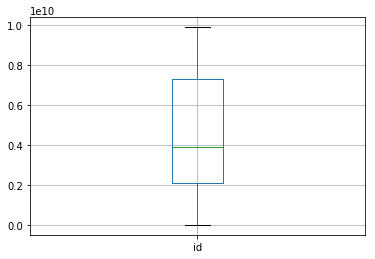

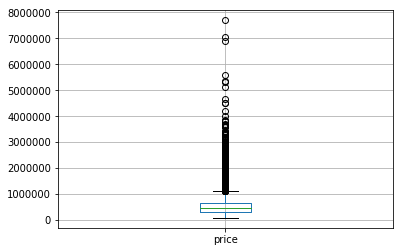

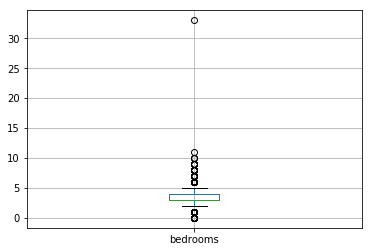

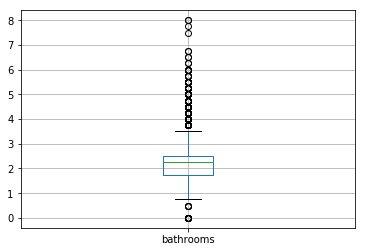

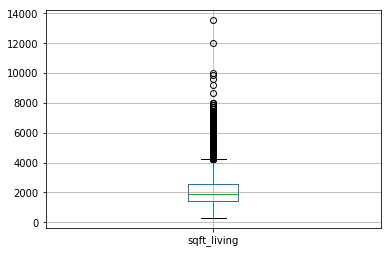

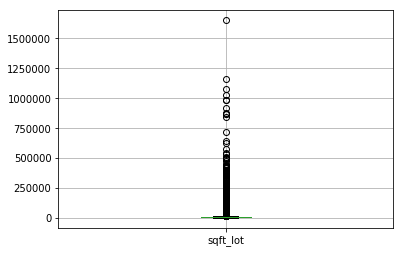

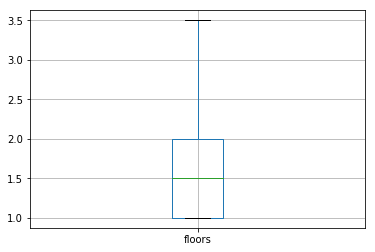

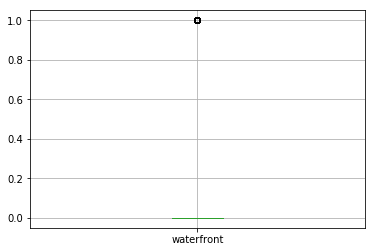

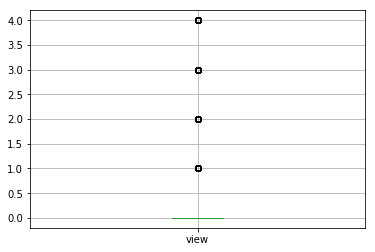

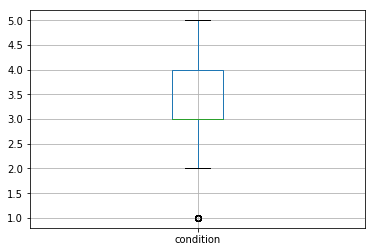

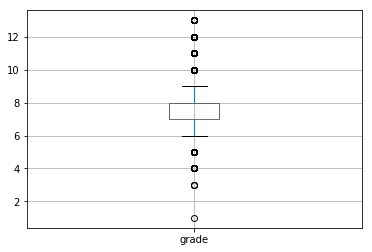

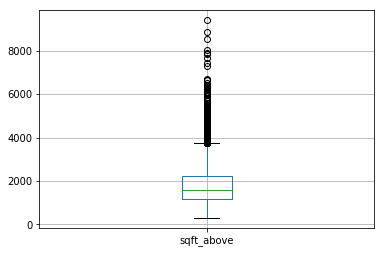

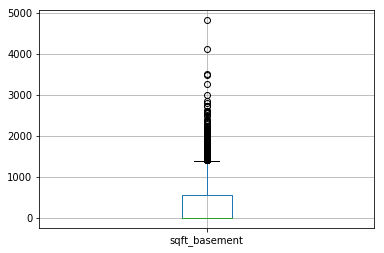

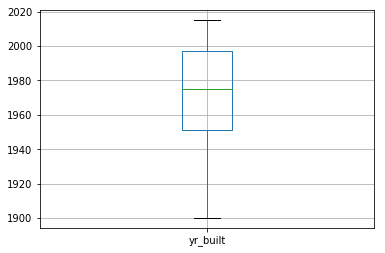

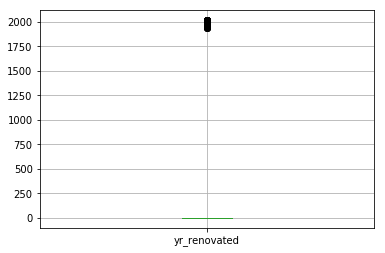

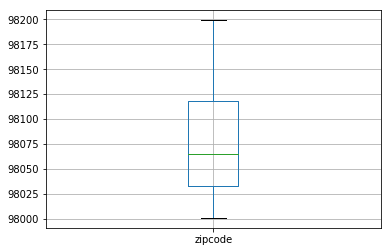

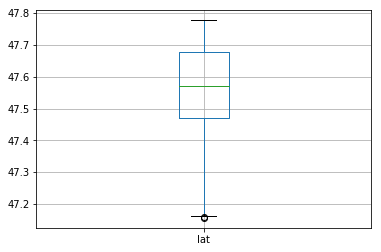

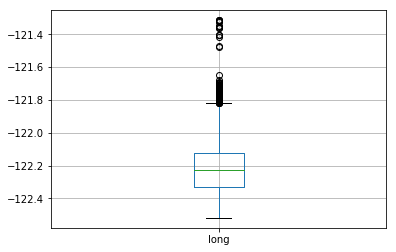

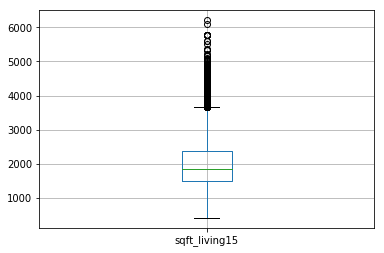

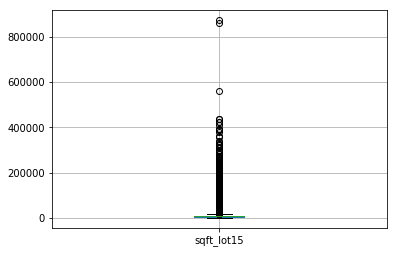

In [4]:
#Determine the size of the data
print(house_data.shape)

#Determine the columns in the data
print(house_data.columns)

#View information about the data in each columns
print(house_data.info())

#Check if the data has any missing values (null)
house_data.isna().sum()

# Checkfor outliers using multiple boxplots
for column in house_data:
    if house_data[column].dtype in ['int64','float64']:
        plt.figure()
        house_data.boxplot(column=[column])

# Although there are some outliers, we are not handling them in this exercise. 

#### Choose features to further work on
In our case, let us pick price as the target; and date, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade as features


In [5]:
house_data_df = house_data[["price","date", "bedrooms", 
                                  "bathrooms", "sqft_living", "floors", 
                                  "waterfront", "view", "condition", "grade"]]

### Feature Engineering
1. Lets split date into year and month to consider that price could depend on year and month of sale due to market conditions
2. Lets treat bedrooms, bathrooms, floors, waterfront, view, condition, grade, year and month as categorical features. 


In [6]:
# Extracting year and month from date
house_data_df["year"] = house_data["date"].str[0:4]
house_data_df["month"] = house_data["date"].str[4:6]

#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])

# Treating features as categorical
cat_features = ["bedrooms", "bathrooms", "floors", "waterfront", 
                "view", "condition", "grade", "year", "month"]
house_data_encoded = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_encoded.columns)

Index(['price', 'sqft_living', 'bedrooms_0', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
       'bathrooms_0.0', 'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0',
       'bathrooms_6.25', 'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5',
       'bathrooms_7.75', 'bathrooms_8.0', 'floors_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'waterfront_0',
       'waterfront_1', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'co

#### Splitting the data into train and test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
house_train,house_test = train_test_split(house_data_encoded,test_size=0.2)

In [9]:
house_train.shape , house_test.shape

((17290, 89), (4323, 89))

#### Building a model on the train data and checking how well the model fits

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
features = house_data_encoded.columns.drop("price")

In [12]:
target = ["price"]

In [13]:
model = LinearRegression()
model.fit(house_train[features],house_train[target])
model.score(house_train[features],house_train[target])

0.6710826551171044

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
train_predictions = model.predict(house_train[features])
mean_squared_error(house_train[target],train_predictions)**0.5

209420.80221981008

#### Evaluate the model's performance on test data

In [16]:
test_predictions = model.predict(house_test[features])

In [17]:
mean_squared_error(house_test[target],test_predictions)**0.5

227002.32183228392